# Discriminant Analysis

* So far, we have seen methods for regression, classification, and clustering. Today, let's look again at classification.
* The goal in *classification* is to take an input vector, **x**, and assign it to one of K discrete classes.  
* Usually this is done by learning *decision boundaries* or *decision surfaces* that divide up the feature space and assign a class to each partition of the feature space created by the decision boundary. 
* Data whose classes can be separated perfectly with a linear decision surface (i.e., a line in 2-D, a plane in 3-D, etc) are called *linearly separable.* These are the easiest classification problems to address. 
* You can encode class labels in a number of ways: binary vectors, class number, etc.  Different encodings make sense in different situations.  But you want to select carefully - depending on the algorithm you use, it can make a difference. 

## Fisher's Linear Discriminant

* We will begin with linear discriminant functions:
\begin{equation}
y(\mathbf{x}) = \mathbf{w}^T\mathbf{x} + w_0
\end{equation}

* *Looks pretty familiar, right?* If you are on one side of the line, then you are in class 1.  If you are on the other side of the line, then you are in class 2.  So, the decision boundary is $y(\mathbf{x}) = 0$
* The distance of a point to the decision boundary is: $\frac{y(\mathbf{x})}{\left\| \mathbf{w} \right\|}$  See Figure 4.1 from textbook. 

* We could use a least squares error function to solve for $\mathbf{w}$ and $w_0$ as we did in regression.  But, there are some issues.  *Can you think of any?*
* A more effective (and well-known) approach is *Fisher's Linear Discriminant*
* Given two classes, we can compute the mean of each class:
\begin{equation}
\mathbf{m}_1 = \frac{1}{{N}_1}\sum_{n\in C_1} \mathbf{x}_n, \quad \mathbf{m}_2 = \frac{1}{N_2}\sum_{n\in C_2} \mathbf{x}_n
\end{equation}
* So, we could try to maximize the separation of the means:
\begin{equation}
m_2 - m_1 = \mathbf{w}^T(\mathbf{m}_2 - \mathbf{m}_1)
\end{equation}
* This is like an optimal *dimensionality reduction*. $\mathbf{w}^T\mathbf{x}$ takes a $D$ dimensional data point and projects it down to 1-D with a weight sum of the original features.  We want to find a weighting that maximizes the separation of the class means. 
* Not only do we want well separate means for each class, but we also want each class to be *compact* to minimize overlap between the classes. 
* Consider the *within class variance:*

\begin{equation}
s_k^2 = \sum_{n \in C_k} (y_n - m_k)^2 = \sum_{n \in C_k} (\mathbf{w}^T\mathbf{x}_n - m_k)^2
\end{equation}
* So, we want to minimize within class variance and maximize between class separability.  How about the following objective function:

\begin{eqnarray}
J(\mathbf{w}) &=& \frac{(m_2 - m_1)^2}{s_1^2 + s_2^2}\\
      &=& \frac{\mathbf{w}^T(\mathbf{m}_2 - \mathbf{m}_1)(\mathbf{m}_2 - \mathbf{m}_1)^T\mathbf{w}}{\sum_{n \in C_1} (\mathbf{w}^T\mathbf{x}_n - m_1)^2 + \sum_{n \in C_2} (\mathbf{w}^T\mathbf{x}_n - m_2)^2}\\
	  &=& \frac{\mathbf{w}^T(\mathbf{m}_2 - \mathbf{m}_1)(\mathbf{m}_2 - \mathbf{m}_1)^T\mathbf{w}}{\mathbf{w}^T\left(\sum_{n \in C_1} (\mathbf{x}_n - \mathbf{m}_1)(\mathbf{x}_n - \mathbf{m}_1)^T + \sum_{n \in C_2} (\mathbf{x}_n - \mathbf{m}_2)(\mathbf{x}_n - \mathbf{m}_2)^T\right)\mathbf{w}}\\
	  &=& \frac{\mathbf{w}^T\mathbf{S}_B\mathbf{w}}{\mathbf{w}^T\mathbf{S}_W\mathbf{w}}
\end{eqnarray}

* Ok, so lets optimize

\begin{eqnarray}
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} &=& \frac{2(\mathbf{w}^T\mathbf{S}_W\mathbf{w})\mathbf{S}_B\mathbf{w} - 2(\mathbf{w}^T\mathbf{S}_B\mathbf{w})\mathbf{S}_W\mathbf{w}}{(\mathbf{w}^T\mathbf{S}_W\mathbf{w})^2} = 0 \\
0 &=& \ \frac{\mathbf{S}_B\mathbf{w}}{(\mathbf{w}^T\mathbf{S}_W\mathbf{w})} -\frac{(\mathbf{w}^T\mathbf{S}_B\mathbf{w})\mathbf{S}_W\mathbf{w}}{(\mathbf{w}^T\mathbf{S}_W\mathbf{w})^2} \\
 (\mathbf{w}^T\mathbf{S}_W\mathbf{w})\mathbf{S}_B\mathbf{w} &=& (\mathbf{w}^T\mathbf{S}_B\mathbf{w})\mathbf{S}_W\mathbf{w} \\
 \mathbf{S}_W^{-1}\mathbf{S}_B\mathbf{w} &=& \lambda\mathbf{w}
\end{eqnarray}

where the scalar $\lambda = \frac{\mathbf{w}^T\mathbf{S}_B\mathbf{w}} { \mathbf{w}^T\mathbf{S}_W\mathbf{w}}$

* *Does this look familiar?* This is the eigenvalue/eigenvector equation.

## Eigenvalues and Eigenvectors

* For a square matrix $\mathbf{A}$ of size $M\times M$, the eigenvector equation is:
\begin{equation}
\mathbf{A}\mathbf{u}_i = \lambda\mathbf{u}_i
\end{equation}
* This can be viewed as a set of $M$ linear equations with the condition (i.e., the *characteristic equation*:
\begin{equation}
|\mathbf{A} - \lambda_i\mathbf{I}| = 0
\end{equation}
* Eigenvalues and eigenvectors play a big role in this course and this area.  We will return to this topic repeatedly. 
* For now, we can recognize the equation and know that there are many solvers that will provide the eigenvalues and orthogonal eigenvectors for a matrix. 


## Reading Assignment

* Section 4.1.7
* Section 5.1

In [2]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import math 

def fisherDiscriminant(data,t):
	# compute sb
	data1 = data[t==0,:]
	data2 = data[t==1,:]
	mean1 = np.atleast_2d(np.mean(data1,0))
	mean2 = np.atleast_2d(np.mean(data2,0))
	Sb  = (mean2 - mean1).T@(mean2 - mean1)
	Sw1 = np.dstack([(data1[i,:]-mean1).T@(data1[i,:]-mean1) for i in range(data1.shape[0])])
	Sw2 = np.dstack([(data2[i,:]-mean2).T@(data2[i,:]-mean2) for i in range(data2.shape[0])])
	Sw = np.sum(Sw1,2) + np.sum(Sw2,2)
	[l, v] = np.linalg.eig(np.linalg.inv(Sw)@Sb)
	data = v[:,l.argsort()[1]]@data.T
	return v[:,l.argsort()[1]],data


100.0


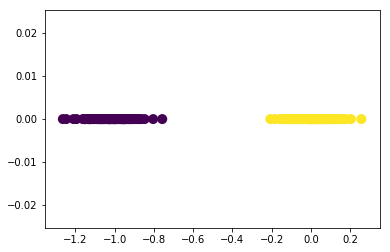

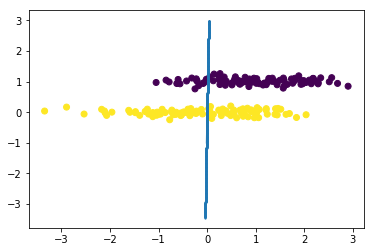

In [5]:
# Fisher's Linear Discriminant
s     = .01
mean1 = [0, 0] #mean of class 1
mean0 = [1, 1] #mean of class 0
cov   = [1,0.01]*np.eye(2) #diagonal covariance
print(np.linalg.cond(cov))
numPnt1 = 100 #number of points for class1
numPnt0 = 100 #number of points for class0
data = np.random.multivariate_normal(mean1, cov, numPnt1) #generate points  for class 1
t      = np.ones([1,numPnt1]) #labels for class
data = np.vstack((data, np.random.multivariate_normal(mean0, cov, numPnt0))) #generate points for class 0
t    = np.hstack((t,np.zeros([1,numPnt0])))
v,data_t = fisherDiscriminant(data,t[0])
fig = plt.figure()
plt.scatter(data_t,np.zeros(data_t.shape),c=t[0,:],linewidth=0,s=100)

fig = plt.figure()
plt.scatter(data[:,0],data[:,1],c=t[0,:])
m = v[1]/v[0]
xx = np.arange(np.min(data[:,0])-.1,np.max(data[:,0])+.1,0.01)/m
yy = m*xx
plt.scatter(xx,yy,linewidth=0,s=5)
plt.plot([0,v[0]], [0,v[1]])
plt.show()